In [1]:
### importing required resources
import pandas as pd
import numpy as np
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [2]:
### specifying file location
file = 'C:/Users/jaska/Desktop/londes_site_daily_combined.xlsx'

In [3]:
### reading the file into dataframe
londesdaily = pd.read_excel(file)

In [4]:
### getting info about dataframe size and type
londesdaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1317 non-null   datetime64[ns]
 1   rain      1300 non-null   float64       
 2   air_temp  1300 non-null   float64       
 3   max_t     1300 non-null   float64       
 4   min_t     1300 non-null   float64       
 5   tile      1317 non-null   float64       
 6   surf      1317 non-null   float64       
 7   srp_tile  1317 non-null   float64       
 8   tp_tile   1317 non-null   float64       
 9   srp_surf  1317 non-null   float64       
 10  tp_surf   1317 non-null   float64       
 11  T10       1172 non-null   float64       
 12  T30       1172 non-null   float64       
 13  T50       1172 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 144.2 KB


In [5]:
londesdaily.head()

,date,rain,air_temp,max_t,min_t,tile,surf,srp_tile,tp_tile,srp_surf,tp_surf,T10,T30,T50
0,2011-10-04 23:44:00,0.0,12.507812,19.389,6.687,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2011-10-05 23:44:00,0.0,13.469906,21.963,5.668,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2011-10-06 23:44:00,0.0,13.698354,21.413,6.712,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2011-10-07 23:44:00,0.0,16.033823,24.339,7.795,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2011-10-08 23:44:00,0.0,17.634000,25.355,12.050,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [6]:
# looking at the shape of the new df
londesdaily.shape

(1317, 14)

In [8]:
# dropping the rows with missing values
londesdaily.dropna(how='any', inplace=True, axis=0)

In [9]:
# checking the shape of updated df after dropping missing values
londesdaily.shape

(1166, 14)

In [10]:
# making a correlation matrix
# first we are interested in water movement only and not P
# so we make a new df without P information
londesnew = londesdaily.drop(londesdaily.columns[7:11], axis=1)
corrMatrix = londesnew.corr()
print(corrMatrix)

              rain  air_temp     max_t     min_t      tile      surf  \
rain      1.000000  0.187558  0.137943  0.228294  0.243142  0.227409   
air_temp  0.187558  1.000000  0.955776  0.979425 -0.063431  0.013732   
max_t     0.137943  0.955776  1.000000  0.901085 -0.126753 -0.005305   
min_t     0.228294  0.979425  0.901085  1.000000 -0.026359  0.026040   
tile      0.243142 -0.063431 -0.126753 -0.026359  1.000000  0.393832   
surf      0.227409  0.013732 -0.005305  0.026040  0.393832  1.000000   
T10       0.143756  0.928318  0.955197  0.893087 -0.171605 -0.044956   
T30       0.144407  0.908493  0.927768  0.880327 -0.179721 -0.048458   
T50       0.141977  0.891448  0.905290  0.867343 -0.185677 -0.048638   

               T10       T30       T50  
rain      0.143756  0.144407  0.141977  
air_temp  0.928318  0.908493  0.891448  
max_t     0.955197  0.927768  0.905290  
min_t     0.893087  0.880327  0.867343  
tile     -0.171605 -0.179721 -0.185677  
surf     -0.044956 -0.048458 -0.0

In [11]:
# Let us look at monthly data

# but first we need to get total rain, surface flow, and tile flow for month
# and for temperatures, its only average values that we need
# therefore, we divide the dataset into two parts
# on one part, we add, and on another we find monthly means

monthly_add = londesnew[['date', 'rain', 'tile', 'surf']]
monthly_mean = londesnew[['date', 'air_temp', 'max_t', 'min_t', 'T10', 'T30', 'T50']]

In [12]:
### finding monthly additions - rain, tile, surf

### setting date as index in the data set
monthly_add.set_index('date')

### resampling data so that we have monthly added values
monthly_add_u = monthly_add.resample('M', on='date').sum()

### dropping empty rows in newly created data set
monthly_add_u.dropna(axis = 0, how = 'any', inplace=True)

# looking at new df
monthly_add_u.head()

,rain,tile,surf
date,,,
2012-01-31,37.0,30.620372,0.0
2012-02-29,13.6,11.520677,0.0
2012-03-31,25.2,16.771730,0.0
2012-04-30,7.6,0.021928,0.0
2012-05-31,8.0,0.047766,0.0


In [13]:
### finding monthly means - temperatures (air and soil)

### setting date as index in the data set
monthly_mean.set_index('date')

### resampling data so that we have monthly added values
monthly_mean_u = monthly_mean.resample('M', on='date').mean()

### dropping empty rows in newly created data set
monthly_mean_u.dropna(axis = 0, how = 'any', inplace=True)

# looking at new df
monthly_mean_u.head()

,air_temp,max_t,min_t,T10,T30,T50
date,,,,,,
2012-01-31,-3.233651,1.804828,-6.728310,1.113455,2.095000,2.610959
2012-02-29,-1.831527,1.697185,-4.949889,0.736026,1.554884,1.950941
2012-03-31,4.184144,9.637565,-1.074609,6.036612,6.046957,5.780122
2012-04-30,6.231333,11.778875,0.544250,7.873158,7.570086,7.318954
2012-05-31,17.172057,24.012905,9.982667,19.040724,17.165109,15.602922


In [14]:
# adding the two datasets together

# first create a df which are the columns to join in 1st df
columns_to_join = monthly_add_u[['rain', 'tile', 'surf']]
londes_monthly = monthly_mean_u.join(columns_to_join)

In [15]:
# shape of new df
londes_monthly.shape

(41, 9)

In [16]:
# now finding the corelations
corrMatrix_monthly = londes_monthly.corr()
print(corrMatrix_monthly)

          air_temp     max_t     min_t       T10       T30       T50  \
air_temp  1.000000  0.981487  0.995157  0.970799  0.964875  0.954341   
max_t     0.981487  1.000000  0.962070  0.989597  0.979029  0.964082   
min_t     0.995157  0.962070  1.000000  0.955799  0.954564  0.948296   
T10       0.970799  0.989597  0.955799  1.000000  0.995867  0.985744   
T30       0.964875  0.979029  0.954564  0.995867  1.000000  0.996921   
T50       0.954341  0.964082  0.948296  0.985744  0.996921  1.000000   
rain      0.445339  0.396490  0.474074  0.418384  0.439771  0.457977   
tile     -0.268930 -0.329263 -0.249535 -0.349740 -0.362164 -0.368388   
surf     -0.117936 -0.160160 -0.090613 -0.175745 -0.181382 -0.183157   

              rain      tile      surf  
air_temp  0.445339 -0.268930 -0.117936  
max_t     0.396490 -0.329263 -0.160160  
min_t     0.474074 -0.249535 -0.090613  
T10       0.418384 -0.349740 -0.175745  
T30       0.439771 -0.362164 -0.181382  
T50       0.457977 -0.368388 -0.1

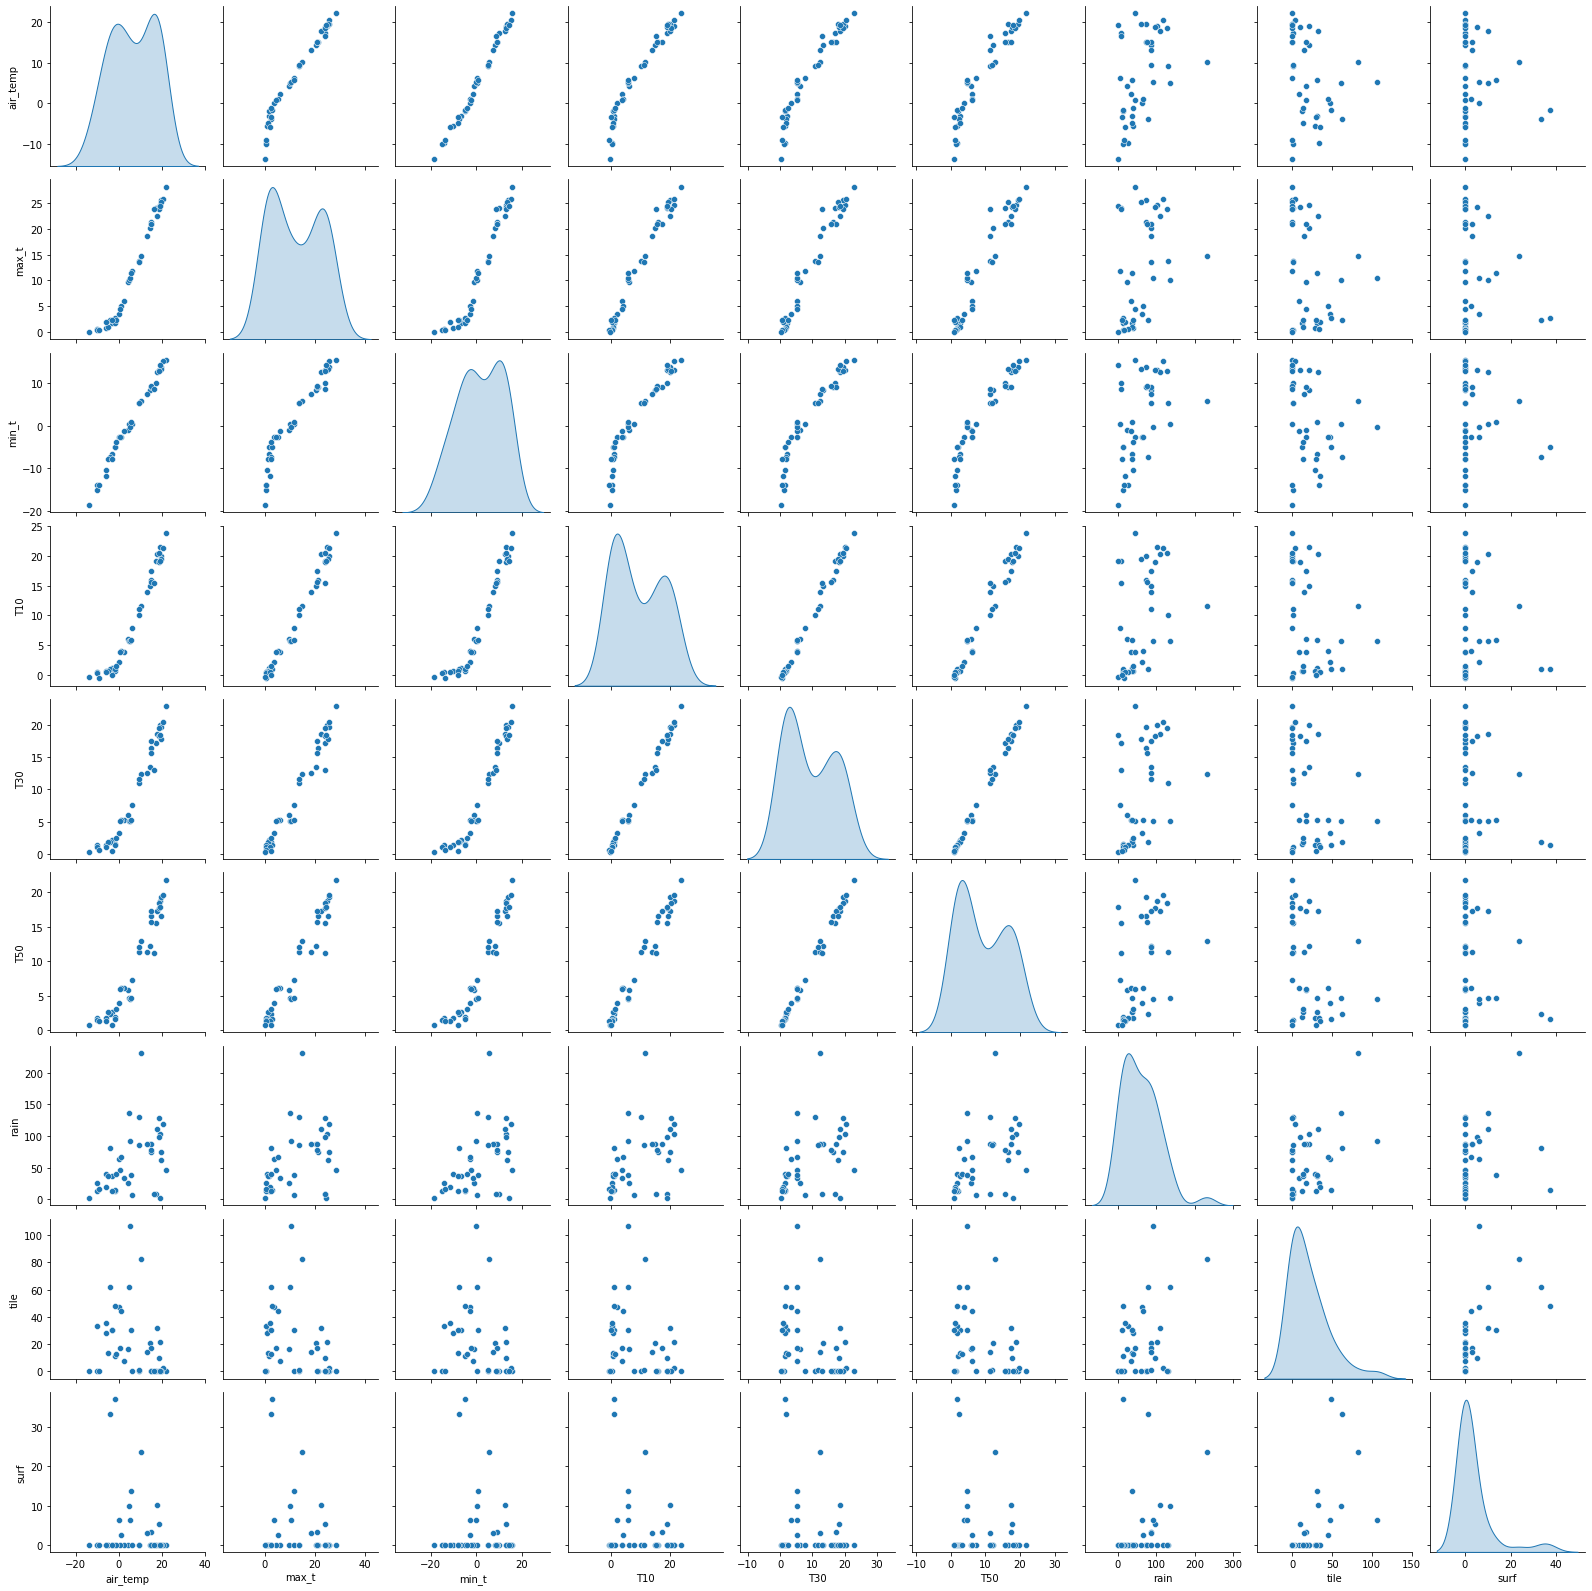

In [98]:
# pairplot for monthly data
sns.pairplot(londes_monthly, diag_kind='kde')

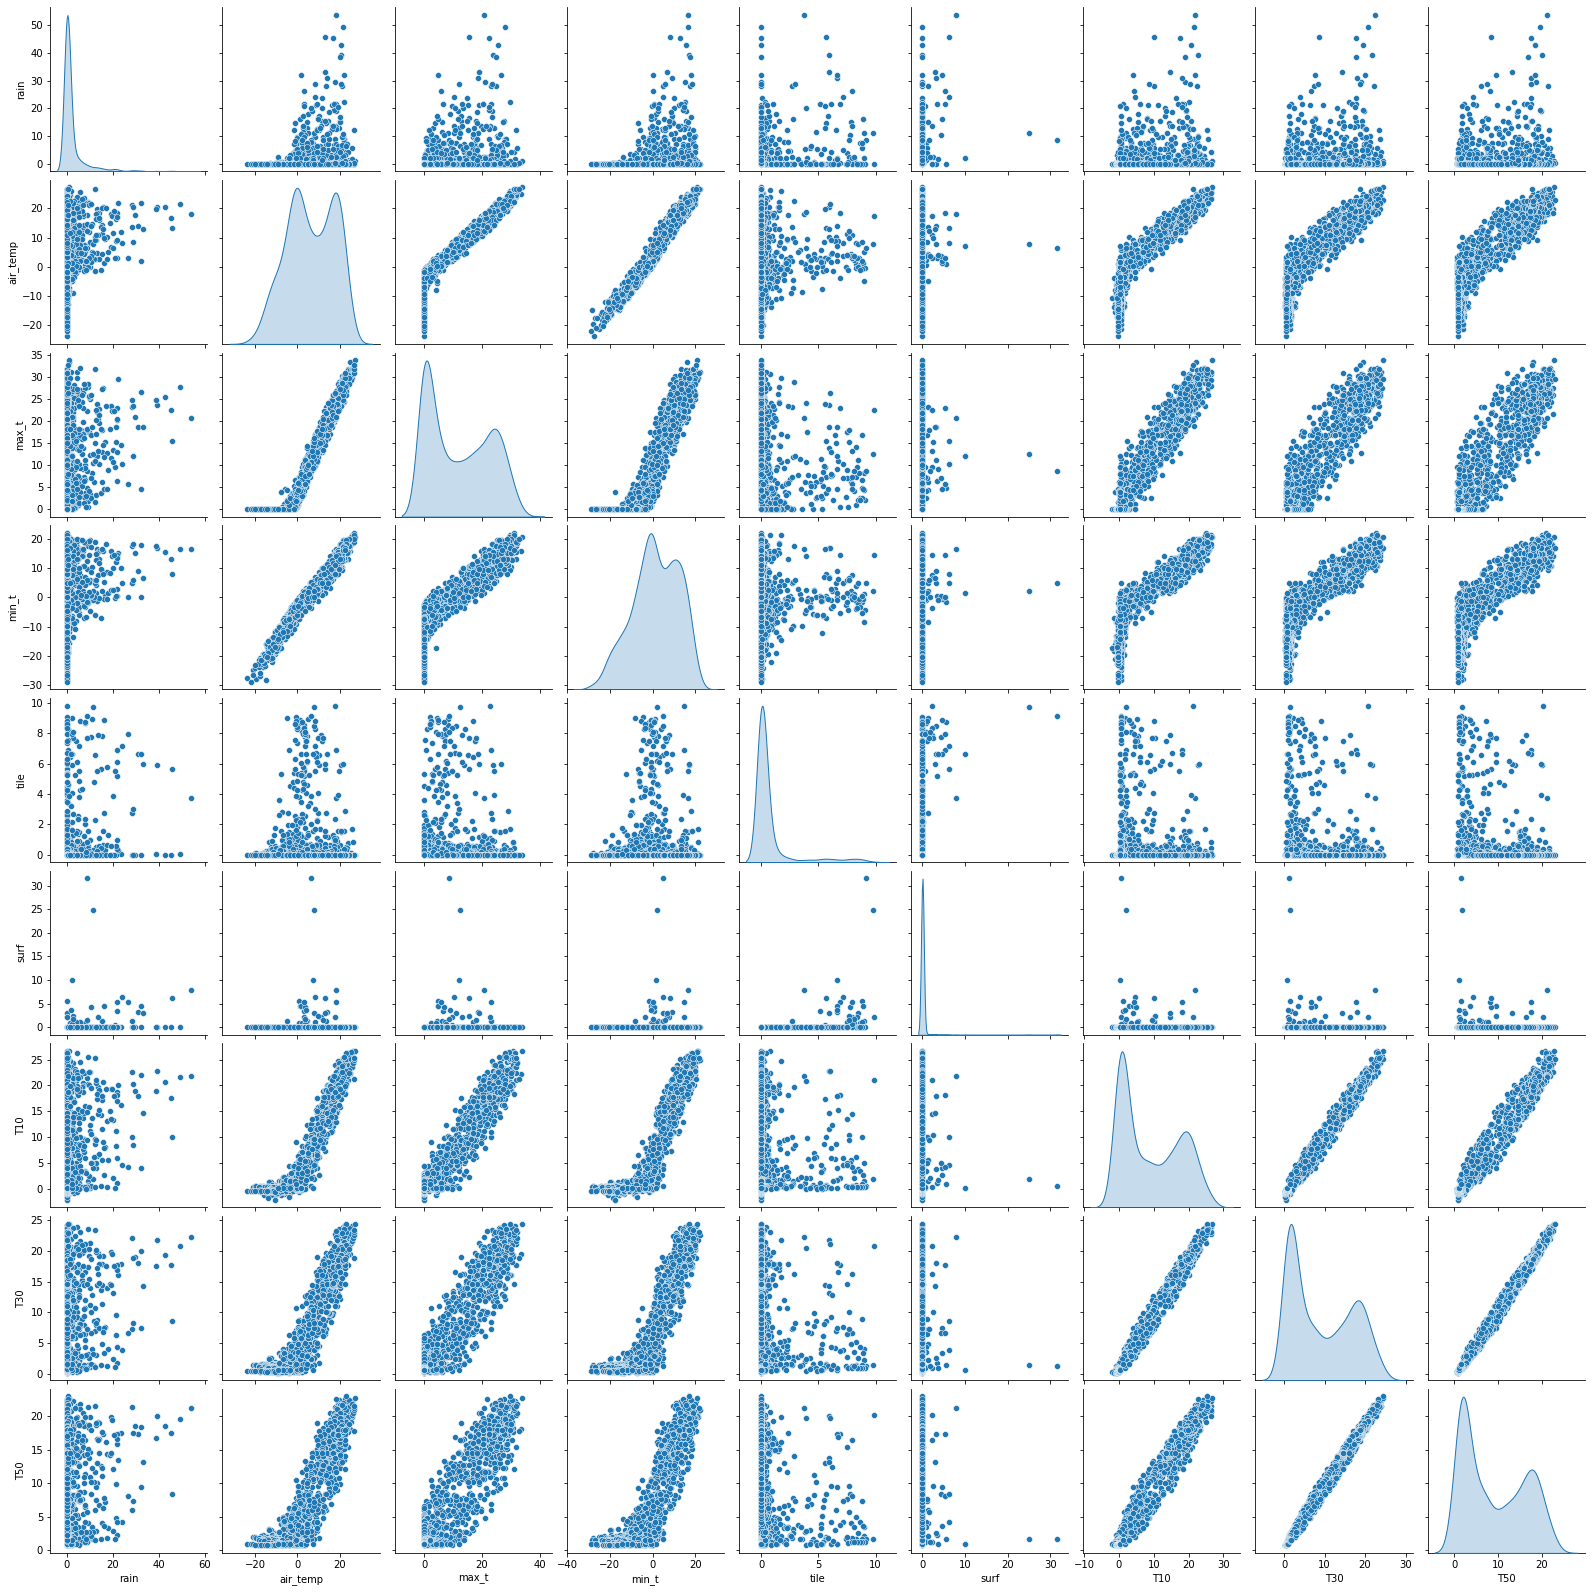

In [99]:
# pairplot for daily data
sns.pairplot(londesnew, diag_kind='kde')

In [17]:
# it will be interesting to see what is going on in the winters
# from our earlier data exploration, we found that Dec-Mar is when soil is most cold at 10 cm


### dividing the daily dataset into different months
jan = londesnew.loc[londesnew['date'].dt.month == 1]
feb = londesnew.loc[londesnew['date'].dt.month == 2]
mar = londesnew.loc[londesnew['date'].dt.month == 3]
apr = londesnew.loc[londesnew['date'].dt.month == 4]
may = londesnew.loc[londesnew['date'].dt.month == 5]
jun = londesnew.loc[londesnew['date'].dt.month == 6]
jul = londesnew.loc[londesnew['date'].dt.month == 7]
aug = londesnew.loc[londesnew['date'].dt.month == 8]
sep = londesnew.loc[londesnew['date'].dt.month == 9]
otb = londesnew.loc[londesnew['date'].dt.month == 10]
nov = londesnew.loc[londesnew['date'].dt.month == 11]
dec = londesnew.loc[londesnew['date'].dt.month == 12]

In [18]:
# combining winter months into one df
londesdaily_winter = pd.concat([dec, jan, feb, mar], ignore_index = True)

In [19]:
londesdaily_winter.head()

,date,rain,air_temp,max_t,min_t,tile,surf,T10,T30,T50
0,2012-12-01 23:44:00,0.0,-1.238500,6.535,-4.987,0.735485,0.000000,1.894479,3.292188,4.197813
1,2012-12-02 23:44:00,24.0,8.261448,10.345,5.102,7.192517,6.355009,4.661042,3.819792,4.162396
2,2012-12-03 23:44:00,0.0,8.079531,14.050,4.115,8.314296,0.000000,6.275312,5.204896,4.962187
3,2012-12-04 23:44:00,12.2,10.386583,15.079,5.102,6.552125,0.000000,8.797813,7.019479,6.053854
4,2012-12-05 23:44:00,0.0,-1.493938,5.179,-6.483,5.397194,0.000000,3.969063,6.223854,6.505104


In [103]:
corrMatrix_w = londesdaily_winter.corr()
print(corrMatrix_w)

              rain  air_temp     max_t     min_t      tile      surf  \
rain      1.000000  0.346855  0.318484  0.328472  0.386012  0.270241   
air_temp  0.346855  1.000000  0.734119  0.960367  0.362555  0.148758   
max_t     0.318484  0.734119  1.000000  0.633966  0.360199  0.189518   
min_t     0.328472  0.960367  0.633966  1.000000  0.356662  0.141436   
tile      0.386012  0.362555  0.360199  0.356662  1.000000  0.394156   
surf      0.270241  0.148758  0.189518  0.141436  0.394156  1.000000   
T10       0.122628  0.557507  0.742597  0.496877  0.163422  0.029523   
T30       0.065990  0.500109  0.614269  0.462953  0.095653 -0.006897   
T50       0.055992  0.471666  0.527388  0.452635  0.057164 -0.015554   

               T10       T30       T50  
rain      0.122628  0.065990  0.055992  
air_temp  0.557507  0.500109  0.471666  
max_t     0.742597  0.614269  0.527388  
min_t     0.496877  0.462953  0.452635  
tile      0.163422  0.095653  0.057164  
surf      0.029523 -0.006897 -0.0

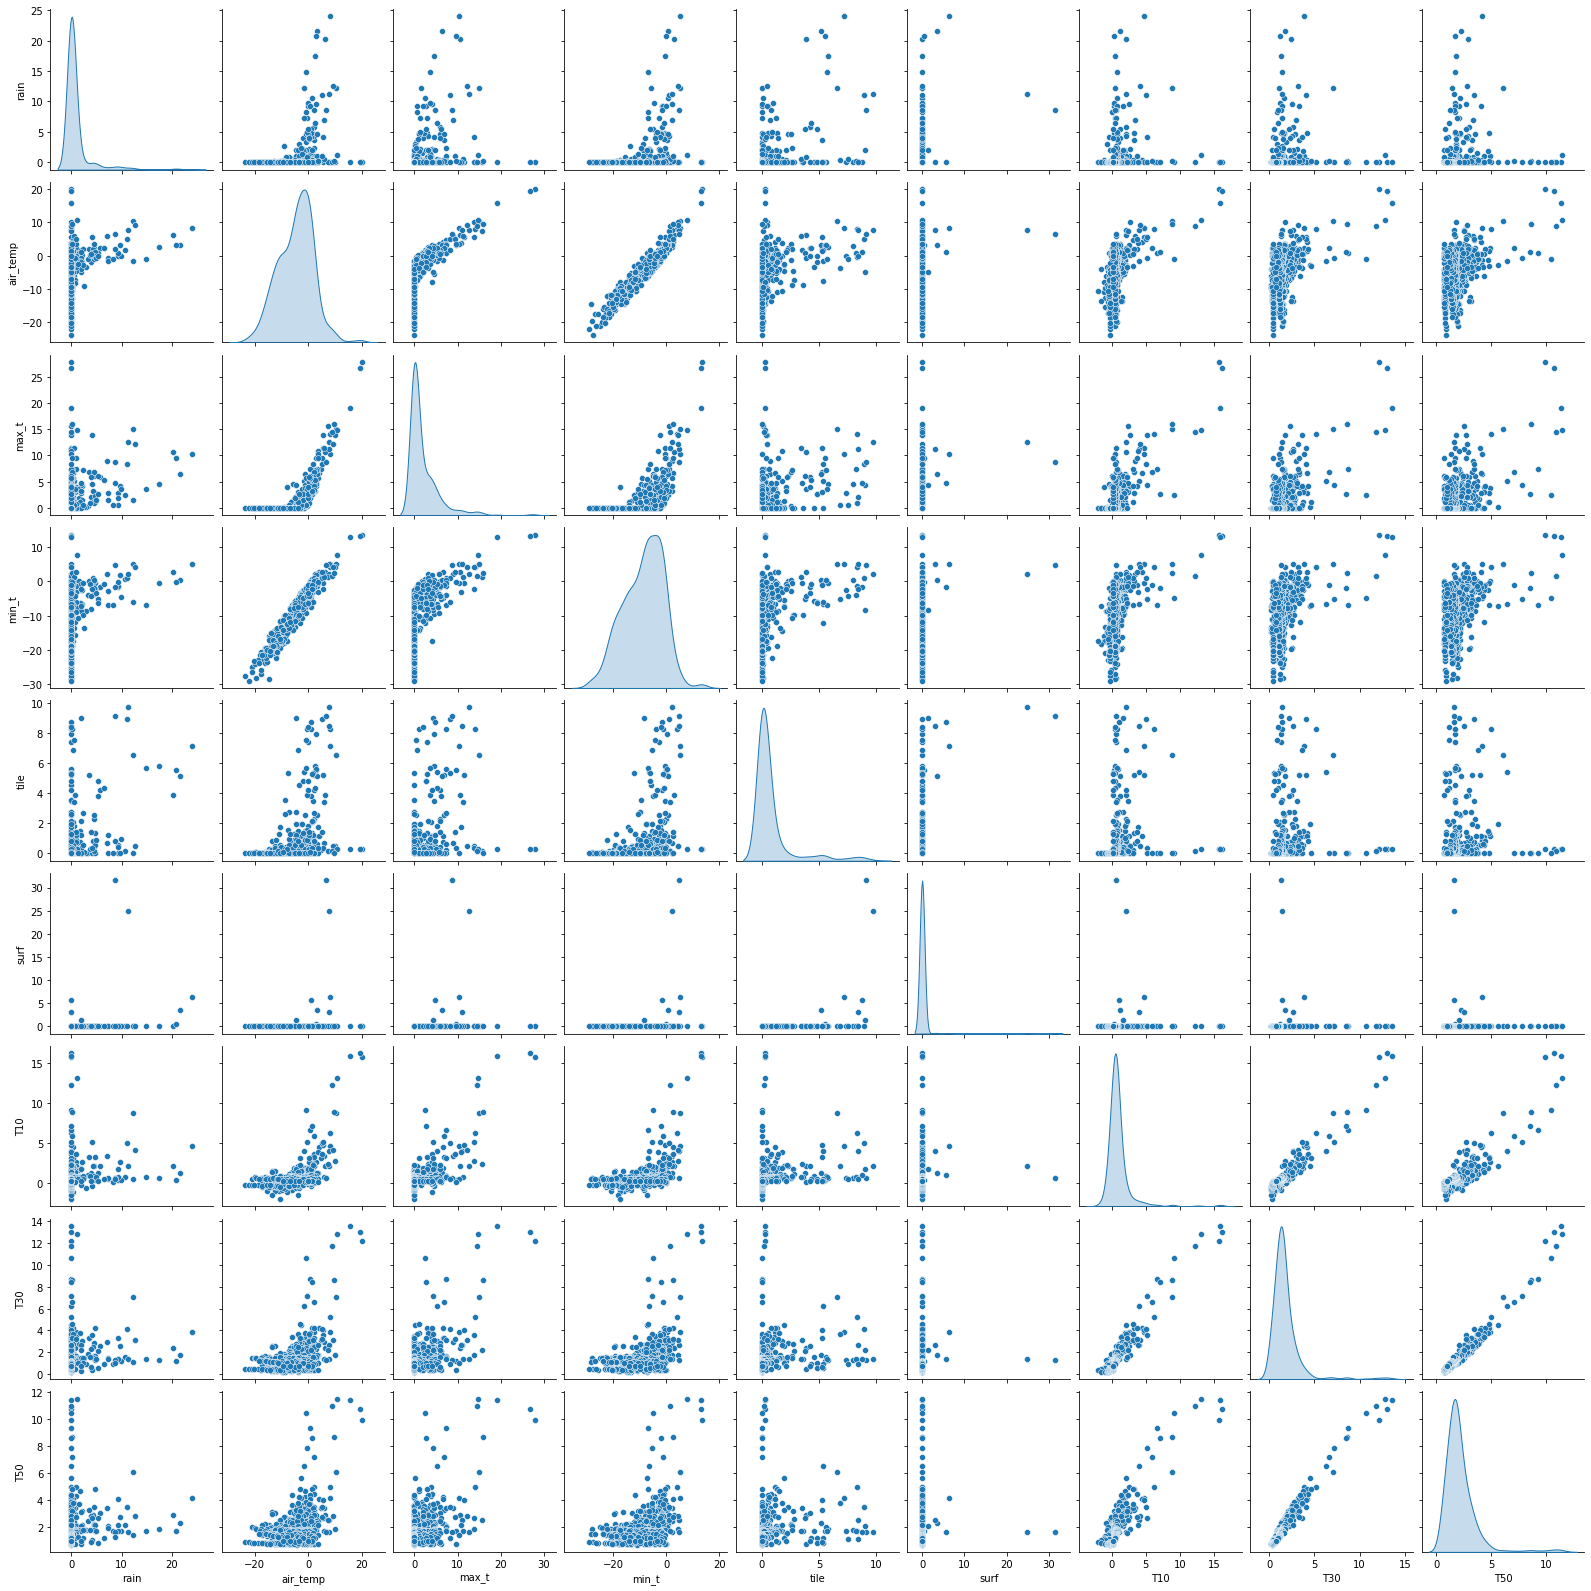

In [104]:
sns.pairplot(londesdaily_winter, diag_kind='kde')

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tile'>

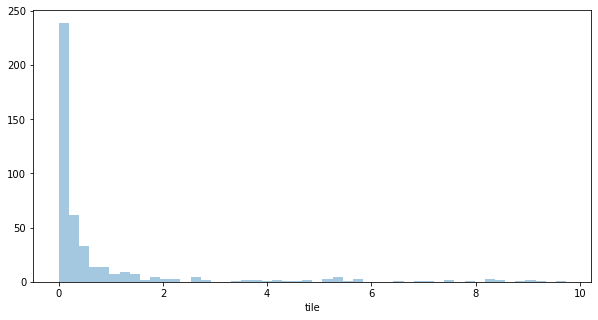

In [114]:
# looking at the tile flow data distribution in winters
plt.figure(figsize=(10,5))
sns.distplot(londesdaily_winter['tile'], kde=False)

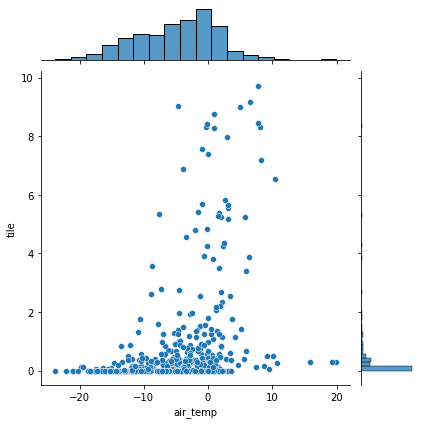

In [131]:
sns.jointplot(x='air_temp', y='tile', data=londesdaily_winter)

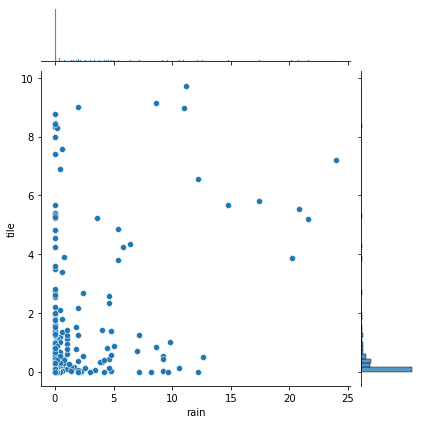

In [132]:
sns.jointplot(x='rain', y='tile', data=londesdaily_winter)

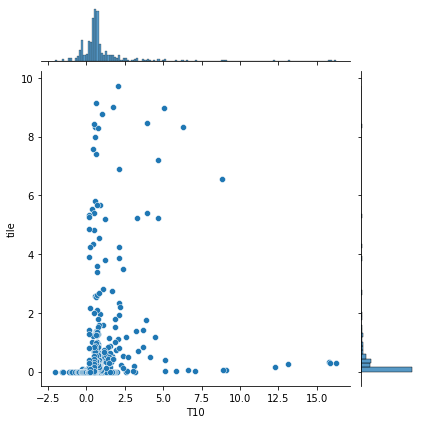

In [133]:
sns.jointplot(x='T10', y='tile', data=londesdaily_winter)

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tile'>

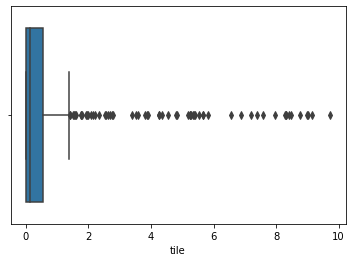

In [136]:
sns.boxplot(londesdaily_winter['tile'])

In [137]:
londesdaily_winter.tile.describe()

count    442.000000
mean       0.837397
std        1.818738
min        0.000000
25%        0.000000
50%        0.133912
75%        0.558585
max        9.730170
Name: tile, dtype: float64

In [138]:
londes_winter_tile = londesdaily_winter.loc[londesdaily_winter['tile']>0]

In [139]:
londes_winter_tile.head()

,date,rain,air_temp,max_t,min_t,tile,surf,T10,T30,T50
0,2012-12-01 23:44:00,0.0,-1.238500,6.535,-4.987,0.735485,0.000000,1.894479,3.292188,4.197813
1,2012-12-02 23:44:00,24.0,8.261448,10.345,5.102,7.192517,6.355009,4.661042,3.819792,4.162396
2,2012-12-03 23:44:00,0.0,8.079531,14.050,4.115,8.314296,0.000000,6.275312,5.204896,4.962187
3,2012-12-04 23:44:00,12.2,10.386583,15.079,5.102,6.552125,0.000000,8.797813,7.019479,6.053854
4,2012-12-05 23:44:00,0.0,-1.493938,5.179,-6.483,5.397194,0.000000,3.969063,6.223854,6.505104


In [140]:
londes_winter_tile.shape

(286, 10)

In [141]:
londesdaily_winter.shape

(442, 10)

In [142]:
# out of 442 days of winter, 286 days the tiles were flowing

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tile'>

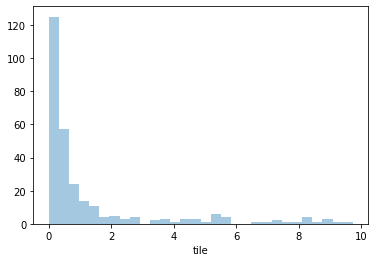

In [143]:
sns.distplot(londes_winter_tile['tile'], kde=False)

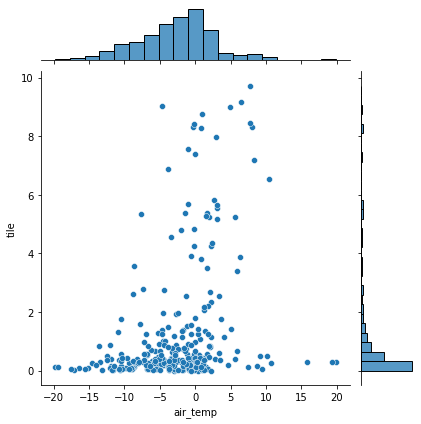

In [144]:
sns.jointplot(x='air_temp', y='tile', data=londes_winter_tile)

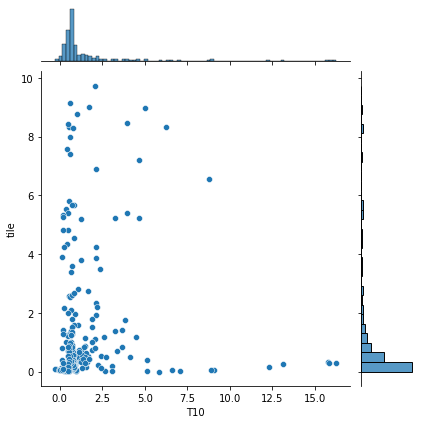

In [145]:
sns.jointplot(x='T10', y='tile', data=londes_winter_tile)

In [147]:
corrMatrix_w_t = londes_winter_tile.corr()
print(corrMatrix_w_t)

              rain  air_temp     max_t     min_t      tile      surf  \
rain      1.000000  0.348839  0.300765  0.329374  0.376465  0.277280   
air_temp  0.348839  1.000000  0.799068  0.949216  0.327357  0.169847   
max_t     0.300765  0.799068  1.000000  0.667650  0.312275  0.186004   
min_t     0.329374  0.949216  0.667650  1.000000  0.318374  0.162237   
tile      0.376465  0.327357  0.312275  0.318374  1.000000  0.396344   
surf      0.277280  0.169847  0.186004  0.162237  0.396344  1.000000   
T10       0.073513  0.586747  0.756356  0.496599  0.068001  0.010266   
T30       0.011252  0.494075  0.622028  0.430754 -0.012409 -0.029975   
T50      -0.001106  0.436792  0.531529  0.394575 -0.057106 -0.040040   

               T10       T30       T50  
rain      0.073513  0.011252 -0.001106  
air_temp  0.586747  0.494075  0.436792  
max_t     0.756356  0.622028  0.531529  
min_t     0.496599  0.430754  0.394575  
tile      0.068001 -0.012409 -0.057106  
surf      0.010266 -0.029975 -0.0

Text(0, 0.5, 'daily tile flow (mm)')

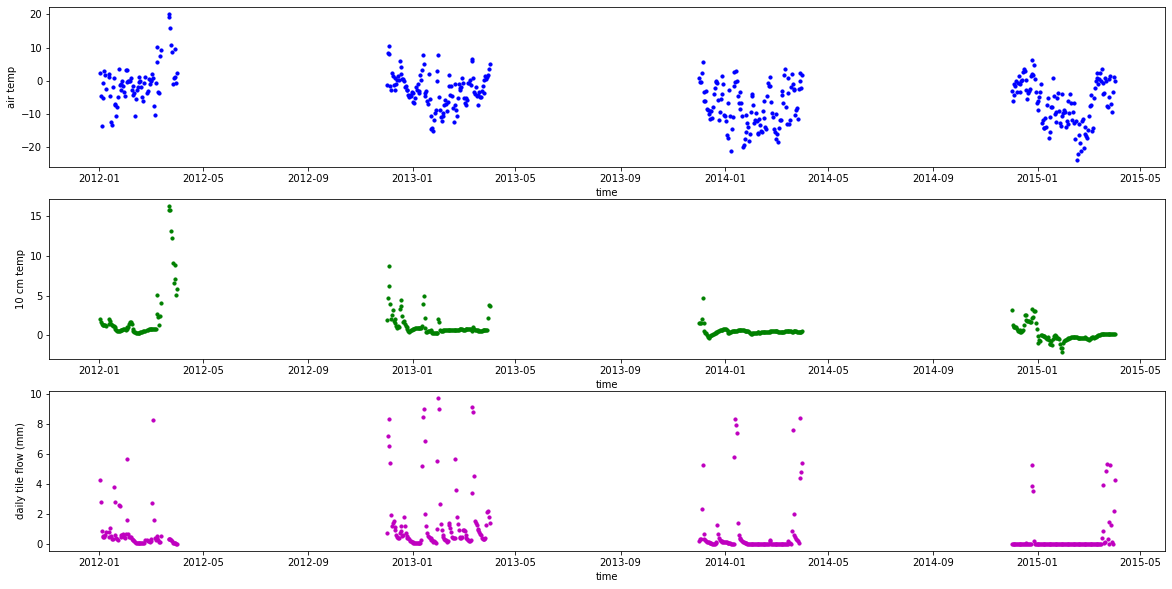

In [154]:
### plotting time series
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.scatter(londesdaily_winter.date, londesdaily_winter.air_temp, s=10, marker='o', c='b')
plt.xlabel('time')
plt.ylabel('air temp')
plt.subplot(3,1,2)
plt.scatter(londesdaily_winter.date, londesdaily_winter.T10, s=10, marker='o', c='g')
plt.xlabel('time')
plt.ylabel('10 cm temp')
plt.subplot(3,1,3)
plt.scatter(londesdaily_winter.date, londesdaily_winter.tile, s=10, marker='o', c='m')
plt.xlabel('time')
plt.ylabel('daily tile flow (mm)')

Text(0, 0.5, 'daily tile flow (mm)')

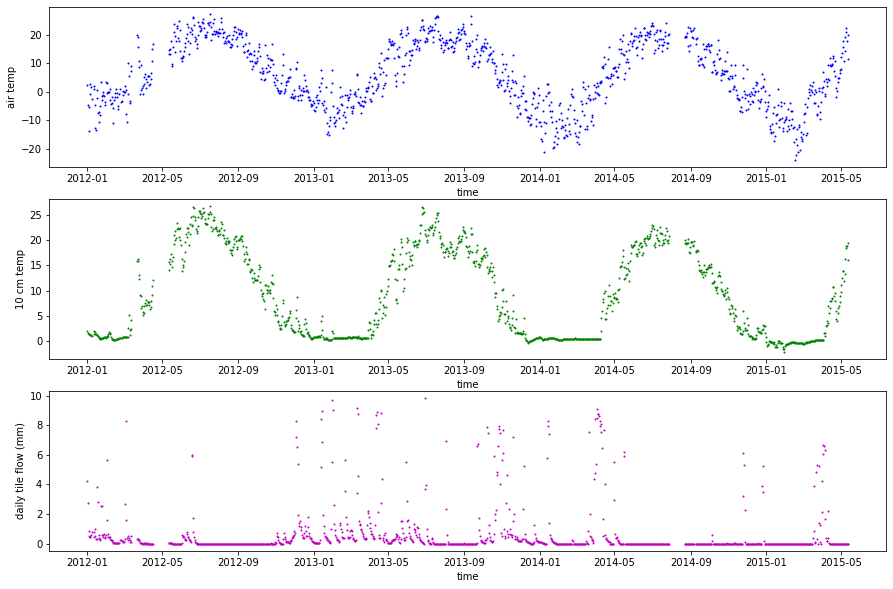

In [157]:
### plotting time series for data from all the years
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.scatter(londesnew.date, londesnew.air_temp, s=1, marker='o', c='b')
plt.xlabel('time')
plt.ylabel('air temp')
plt.subplot(3,1,2)
plt.scatter(londesnew.date, londesnew.T10, s=1, marker='o', c='g')
plt.xlabel('time')
plt.ylabel('10 cm temp')
plt.subplot(3,1,3)
plt.scatter(londesnew.date, londesnew.tile, s=1, marker='o', c='m')
plt.xlabel('time')
plt.ylabel('daily tile flow (mm)')

Text(0, 0.5, 'daily tile flow (mm)')

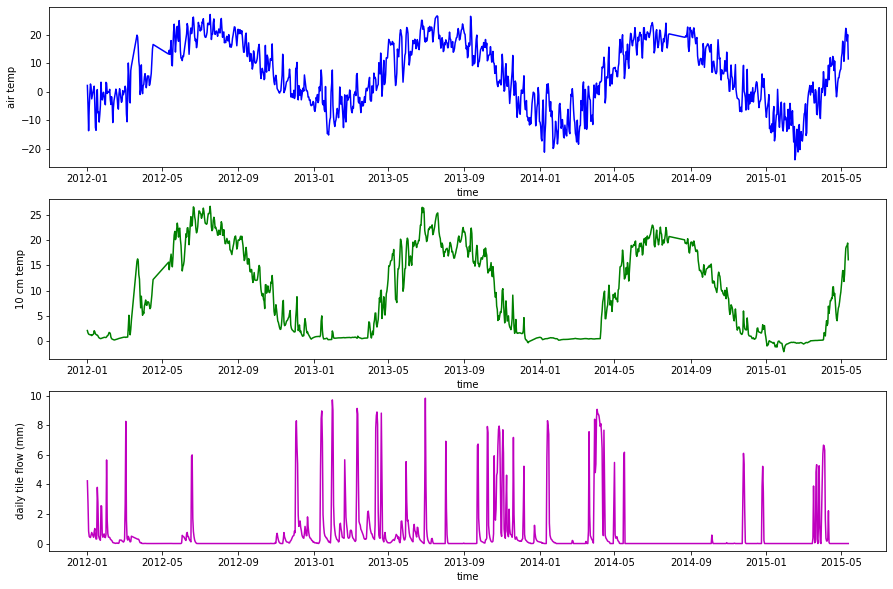

In [175]:
### plotting time series for data from all the years
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(londesnew.date, londesnew.air_temp, c='b')
plt.xlabel('time')
plt.ylabel('air temp')
plt.subplot(3,1,2)
plt.plot(londesnew.date, londesnew.T10, c='g')
plt.xlabel('time')
plt.ylabel('10 cm temp')
plt.subplot(3,1,3)
plt.plot(londesnew.date, londesnew.tile, c='m')
plt.xlabel('time')
plt.ylabel('daily tile flow (mm)')

In [192]:
londesnew['MA_5'] = londesnew.air_temp.rolling(5, min_periods=1).mean()

In [193]:
londesnew['MA_10'] = londesnew.air_temp.rolling(10, min_periods=1).mean()

In [194]:
londesnew.head()

,date,rain,air_temp,max_t,min_t,tile,surf,T10,T30,T50,MA_5,MA_10,MA_20
89,2012-01-01 23:44:00,5.8,2.296625,5.949,-1.727,4.248543,0.0,2.126042,2.607188,3.009062,2.296625,2.296625,NaN
90,2012-01-02 23:44:00,0.0,-4.466979,0.000,-9.782,2.753715,0.0,1.671667,2.741354,3.164896,-1.085177,-1.085177,NaN
91,2012-01-03 23:44:00,0.0,-13.603437,0.000,-16.202,0.833749,0.0,1.430000,2.576875,3.135729,-5.257931,-5.257931,NaN
92,2012-01-04 23:44:00,0.0,-5.275156,0.000,-12.825,0.479217,0.0,1.345729,2.439271,3.017187,-5.262237,-5.262237,NaN
93,2012-01-05 23:44:00,0.8,-0.791854,0.632,-1.613,0.430748,0.0,1.316250,2.365000,2.944063,-4.368160,-4.368160,NaN


In [195]:
londesnew.drop(columns=['MA_20'], inplace=True, axis=1)

In [196]:
londesnew.head()

,date,rain,air_temp,max_t,min_t,tile,surf,T10,T30,T50,MA_5,MA_10
89,2012-01-01 23:44:00,5.8,2.296625,5.949,-1.727,4.248543,0.0,2.126042,2.607188,3.009062,2.296625,2.296625
90,2012-01-02 23:44:00,0.0,-4.466979,0.000,-9.782,2.753715,0.0,1.671667,2.741354,3.164896,-1.085177,-1.085177
91,2012-01-03 23:44:00,0.0,-13.603437,0.000,-16.202,0.833749,0.0,1.430000,2.576875,3.135729,-5.257931,-5.257931
92,2012-01-04 23:44:00,0.0,-5.275156,0.000,-12.825,0.479217,0.0,1.345729,2.439271,3.017187,-5.262237,-5.262237
93,2012-01-05 23:44:00,0.8,-0.791854,0.632,-1.613,0.430748,0.0,1.316250,2.365000,2.944063,-4.368160,-4.368160


In [197]:
londesnew.tail()

,date,rain,air_temp,max_t,min_t,tile,surf,T10,T30,T50,MA_5,MA_10
1312,2015-05-08 23:44:00,0.0,22.339594,30.950,16.225,0.0,0.0,18.363125,14.611667,12.061667,16.563044,14.210203
1313,2015-05-09 23:44:00,0.2,21.039813,28.593,13.257,0.0,0.0,18.764271,15.591875,13.117083,17.583094,15.550770
1314,2015-05-10 23:44:00,0.2,17.833687,26.353,11.248,0.0,0.0,18.803958,15.993333,13.748646,18.996023,16.528135
1315,2015-05-11 23:44:00,4.4,20.126687,27.360,13.137,0.0,0.0,19.404062,16.587708,14.291354,20.152973,17.327694
1316,2015-05-12 23:44:00,1.2,11.596771,18.320,5.150,0.0,0.0,16.109479,16.034583,14.540000,18.587310,17.123905


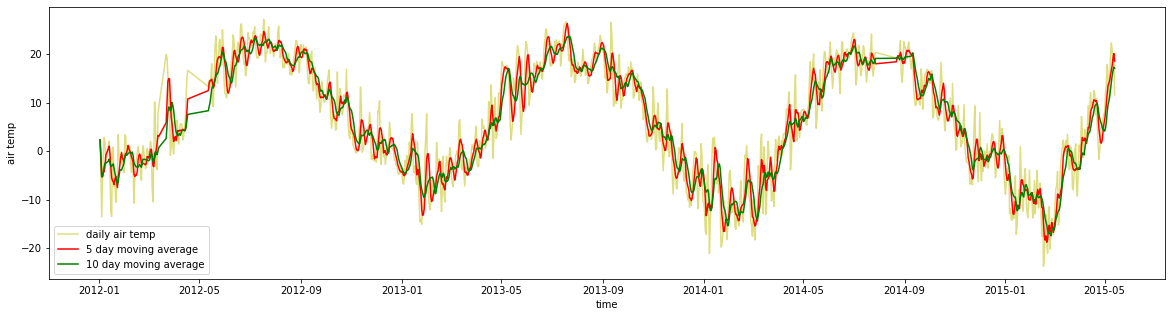

In [204]:
plt.figure(figsize=(20, 5))
plt.plot(londesnew.date, londesnew.air_temp, c='y', alpha=0.5, label='daily air temp')
plt.plot(londesnew.date, londesnew.MA_5, c='r', label='5 day moving average')
plt.plot(londesnew.date, londesnew.MA_10, c='g', label='10 day moving average')
plt.xlabel('time')
plt.ylabel('air temp')
plt.legend(loc=0)

In [1]:
londes_winter_rain = londesdaily_winter.loc[londesdaily_winter['rain']>0]

NameError: name 'londesdaily_winter' is not defined

In [22]:
londes_winter_rain = londesdaily_winter.loc[londesdaily_winter['rain']>0]

In [23]:
londes_winter_rain.shape

(127, 10)